# Streaming Subscription Churn
## Scientific Question: "What key user behaviors and subscription patterns contribute to customer churn in music streaming services?"
## Refined Scientific Question: "How do user age, listening behavior, and engagement with the platform (e.g., subscription pauses, song skipping, and notification clicks) influence the likelihood of churn in music streaming services?"
##### Ideas: predictive model to determine future subscription, and you can also use advanced statistical methods to detect if there are any factors that influenced the subscription

## Exploring the Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 1. Understand the Dataset's Structure
print("Shape of dataset:", train.shape)
print("\nData types:\n", train.dtypes)
print("\nFirst 5 rows:\n", train.head())

# 2. Check for Missing Data & Data Quality
print("\nMissing values per column:\n", train.isnull().sum())
print("\nNumber of duplicate rows:", train.duplicated().sum())


Shape of dataset: (125000, 20)

Data types:
 customer_id                     int64
age                             int64
location                       object
subscription_type              object
payment_plan                   object
num_subscription_pauses         int64
payment_method                 object
customer_service_inquiries     object
signup_date                     int64
weekly_hours                  float64
average_session_length        float64
song_skip_rate                float64
weekly_songs_played             int64
weekly_unique_songs             int64
num_favorite_artists            int64
num_platform_friends            int64
num_playlists_created           int64
num_shared_playlists            int64
notifications_clicked           int64
churned                         int64
dtype: object

First 5 rows:
    customer_id  age    location subscription_type payment_plan  \
0            1   32     Montana              Free       Yearly   
1            2   64  New Jersey  

##### In our training data set, we hae 125000 rows and 20 columns. In our test data set, we have 75000 and 19 columns. In both the training data set and the test data set, we have no missing values. We get the summary statistics to obtain some values of our data set that could be important to note. In our location, subscription, payment_plan, and payment_method, they are all categorical variables. We have both numerical and categorical varaibles in our dataset. We have no missing values and no duplicates in our dataset. 

## Exploratory Data Analysis (EDA)

### Univariate Exploration


Numerical Summary:
          customer_id            age  num_subscription_pauses    signup_date  \
count  125000.000000  125000.000000            125000.000000  125000.000000   
mean    62500.500000      48.414136                 1.991144   -1460.678936   
std     36084.536162      17.901042                 1.417201     844.132871   
min         1.000000      18.000000                 0.000000   -2922.000000   
25%     31250.750000      33.000000                 1.000000   -2190.000000   
50%     62500.500000      48.000000                 2.000000   -1462.000000   
75%     93750.250000      64.000000                 3.000000    -728.000000   
max    125000.000000      79.000000                 4.000000      -1.000000   

        weekly_hours  average_session_length  song_skip_rate  \
count  125000.000000           125000.000000   125000.000000   
mean       25.036985               60.421725        0.500802   
std        14.447487               34.383782        0.288706   
min        

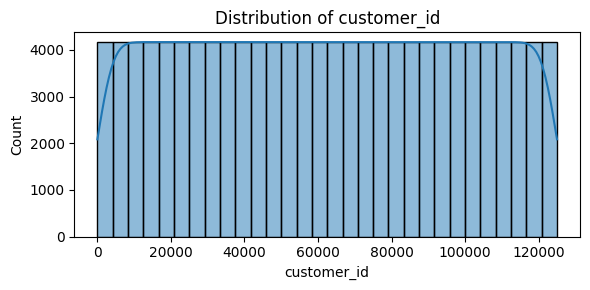

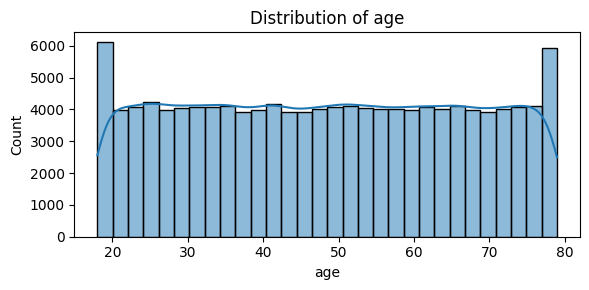

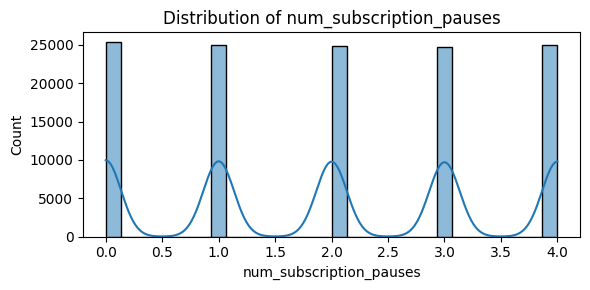

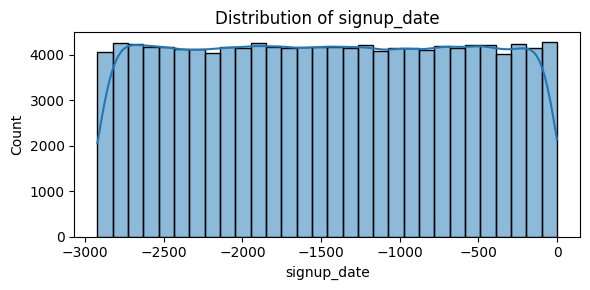

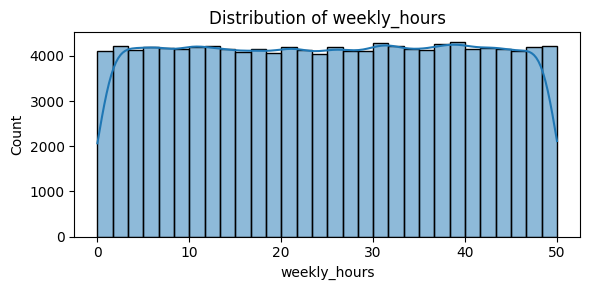

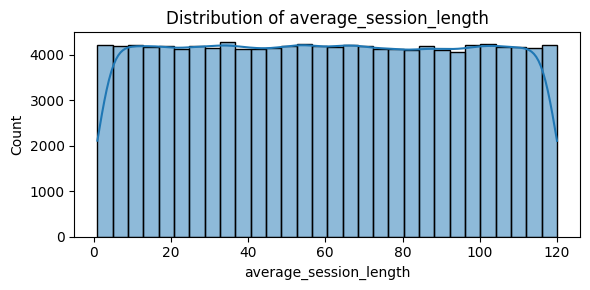

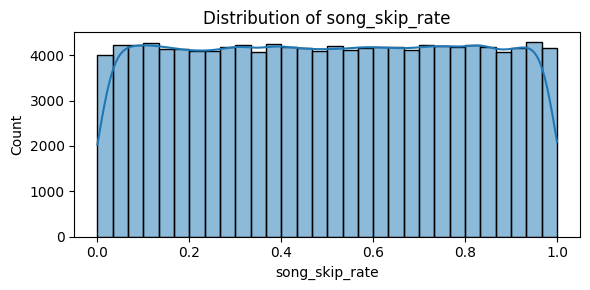

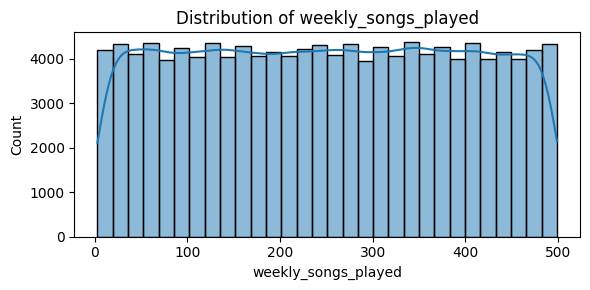

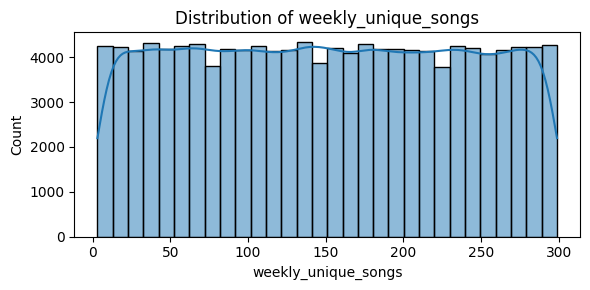

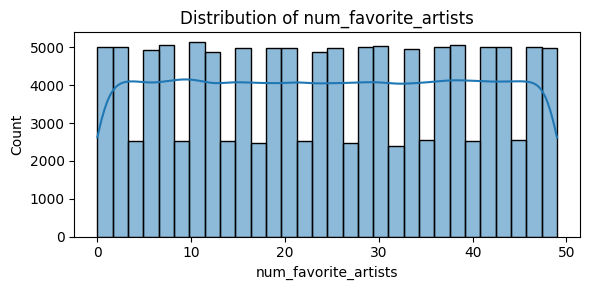

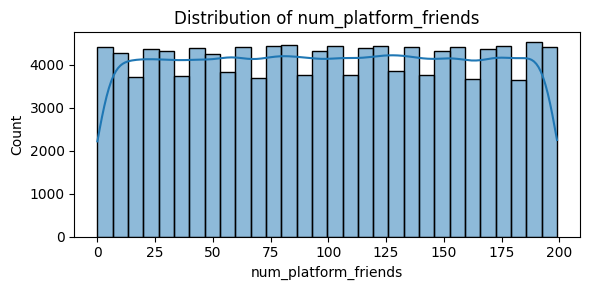

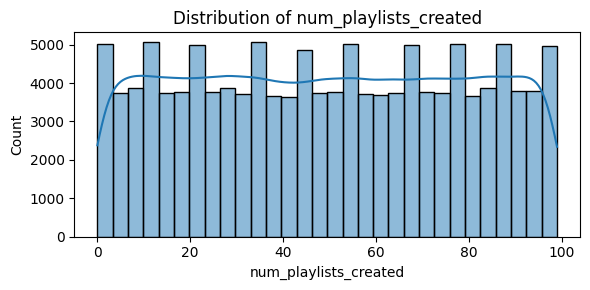

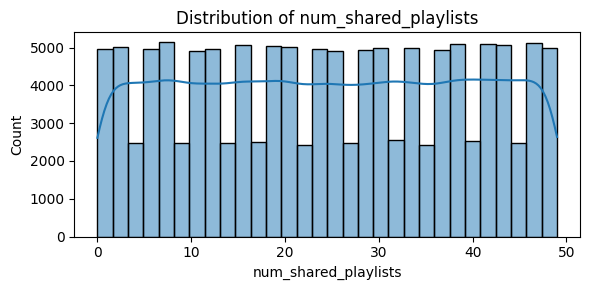

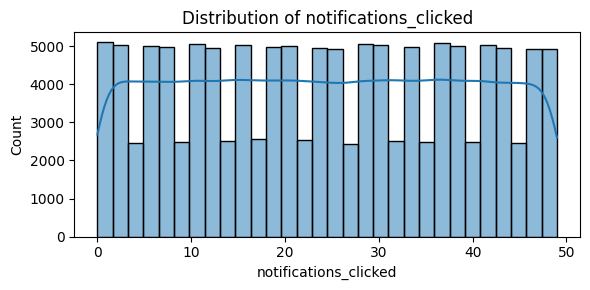

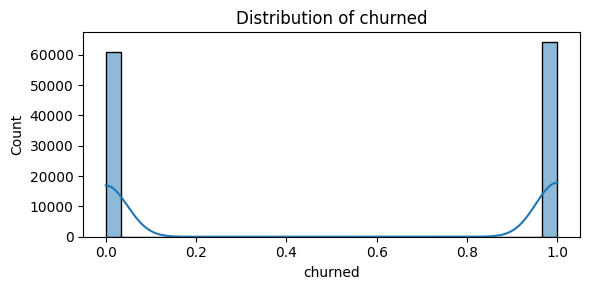

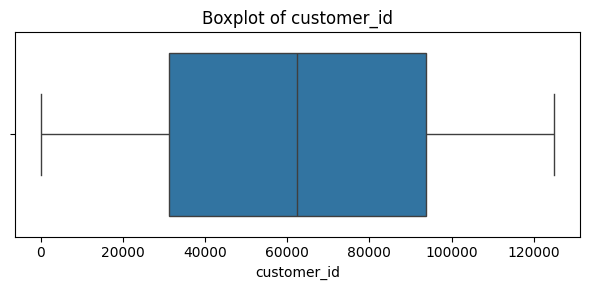

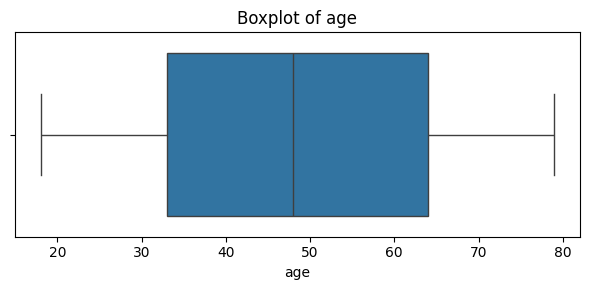

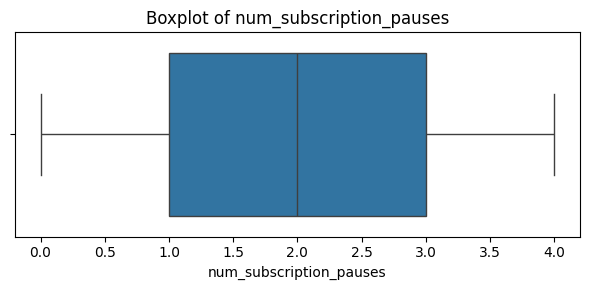

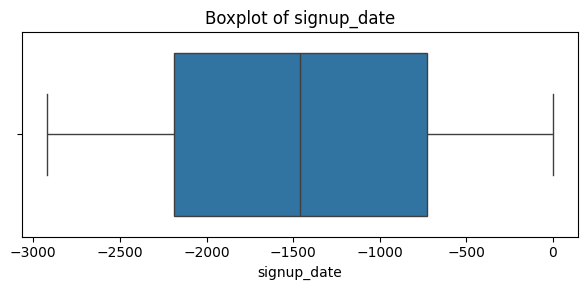

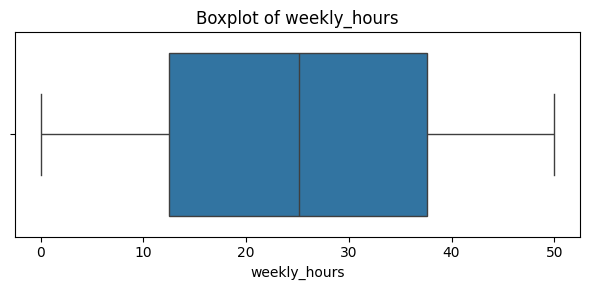

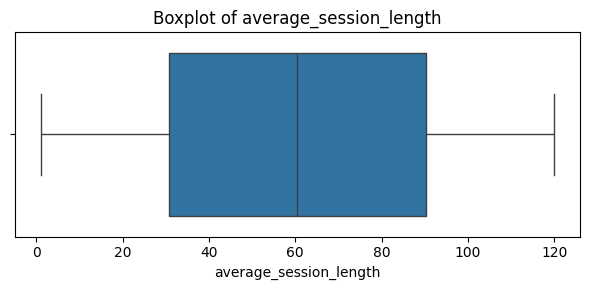

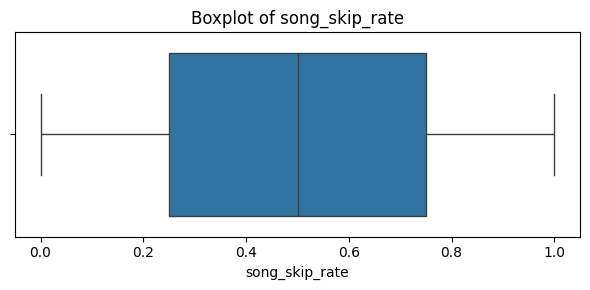

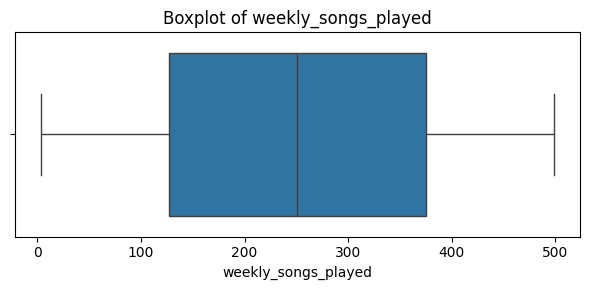

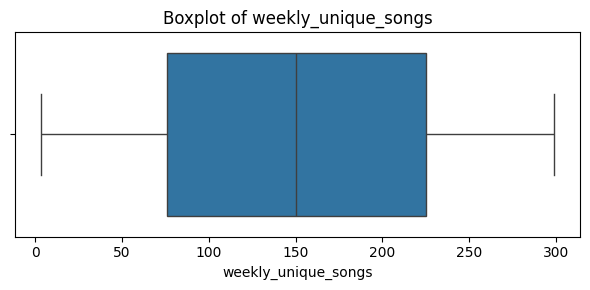

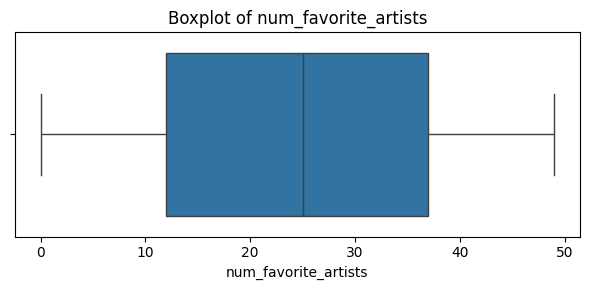

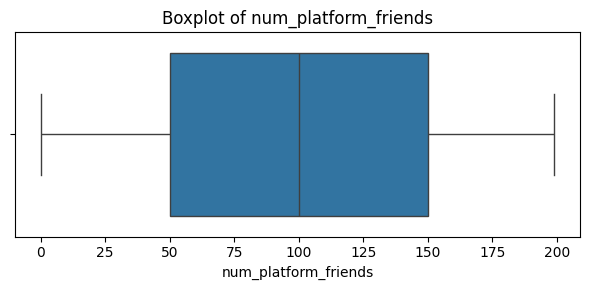

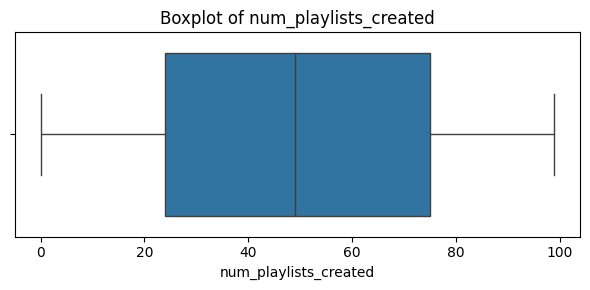

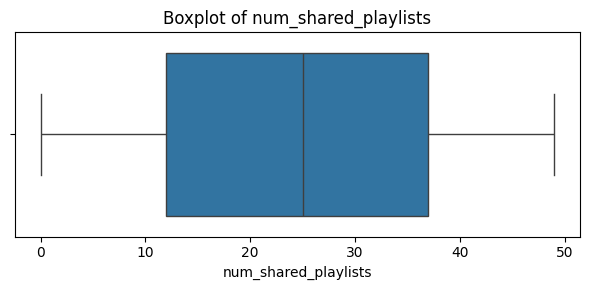

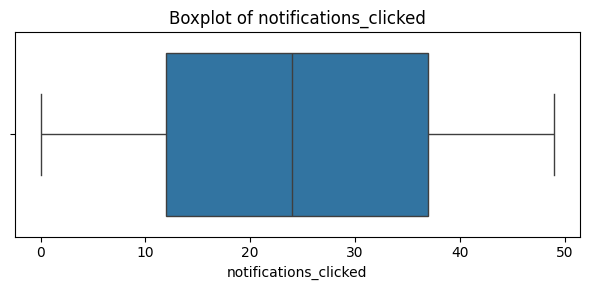

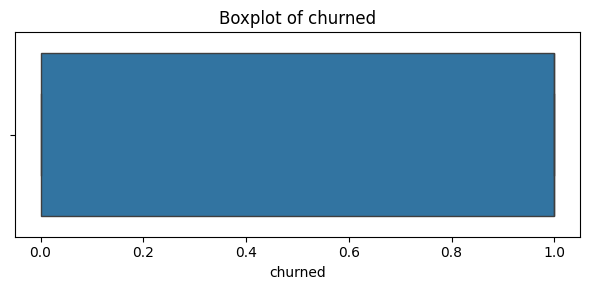

age | Skewness: 0.01
num_subscription_pauses | Skewness: 0.01
signup_date | Skewness: 0.00
weekly_hours | Skewness: -0.00
average_session_length | Skewness: 0.00
song_skip_rate | Skewness: -0.00
weekly_songs_played | Skewness: 0.00
weekly_unique_songs | Skewness: 0.01
num_favorite_artists | Skewness: -0.00
num_platform_friends | Skewness: -0.00
num_playlists_created | Skewness: 0.00
num_shared_playlists | Skewness: -0.00
notifications_clicked | Skewness: 0.00
churned | Skewness: -0.05


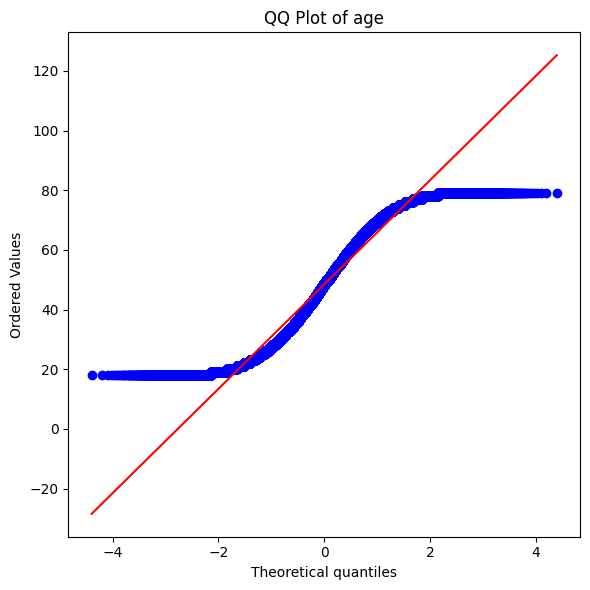

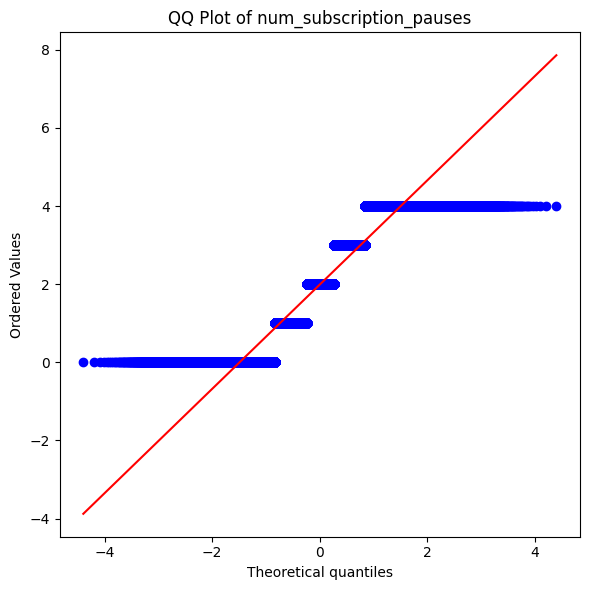

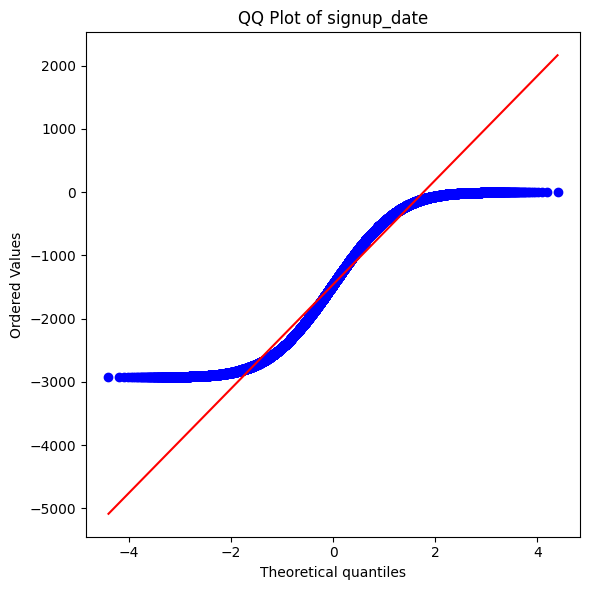

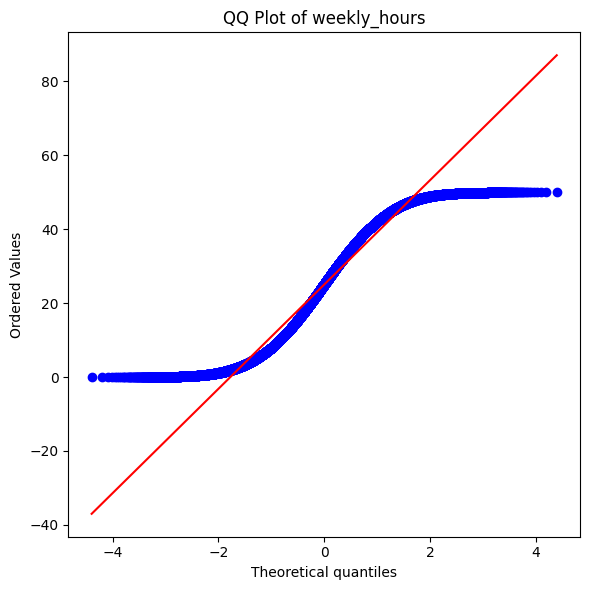

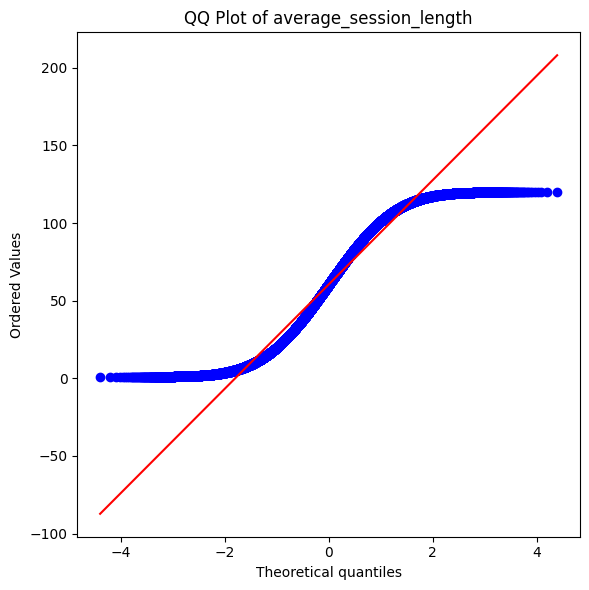

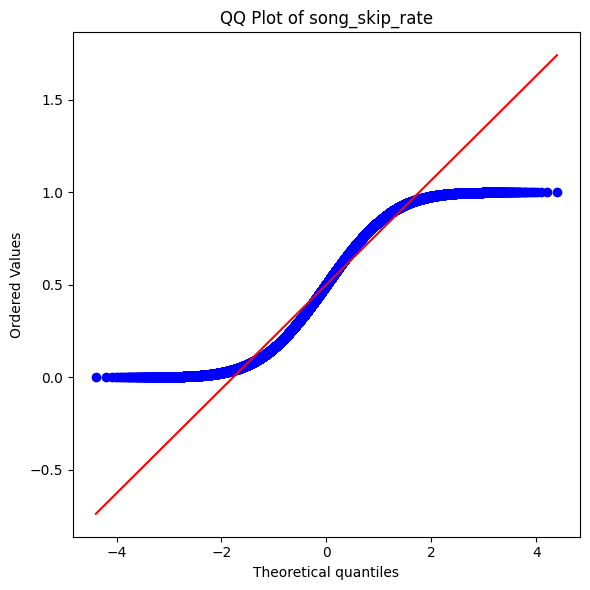

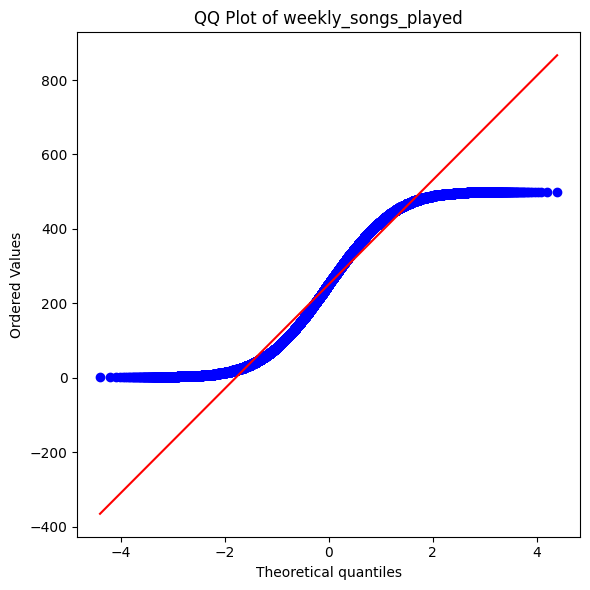

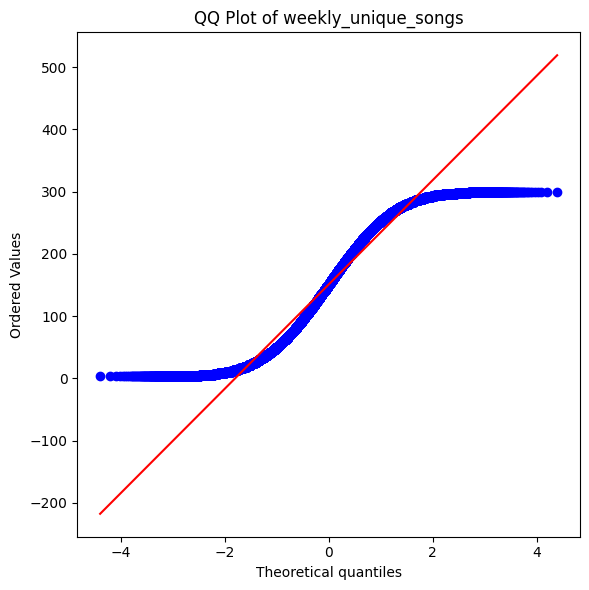

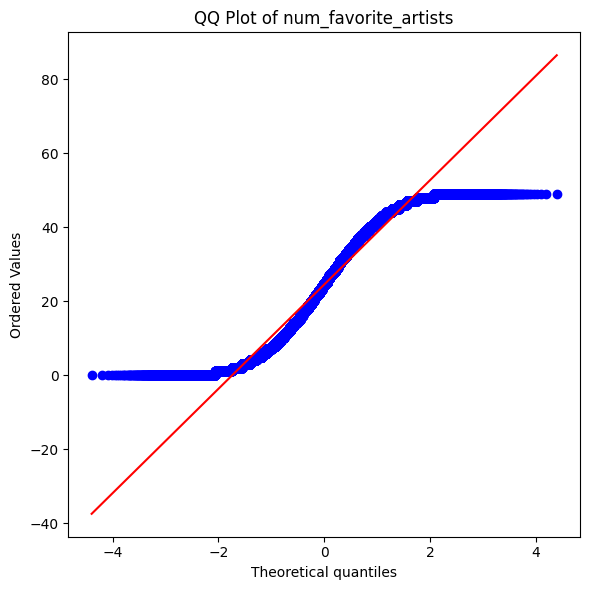

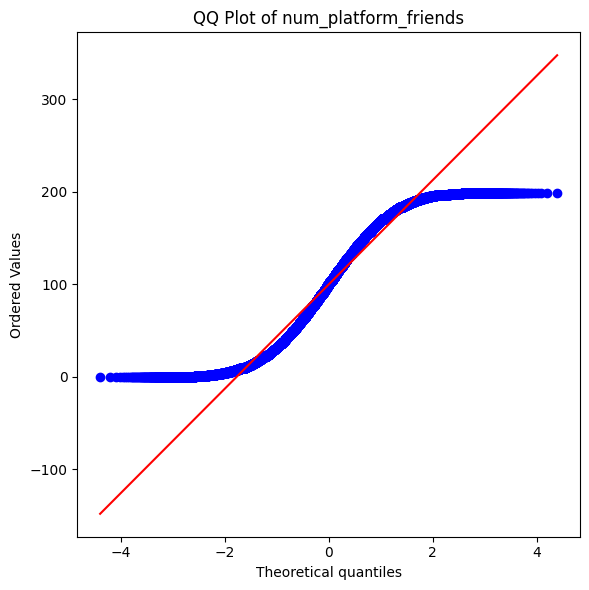

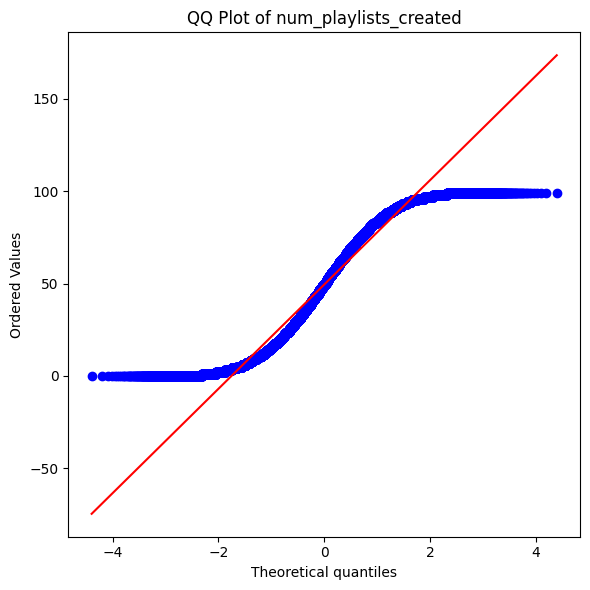

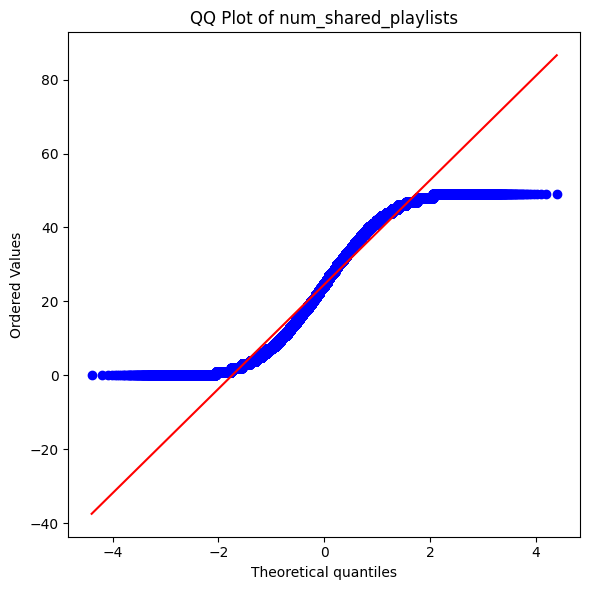

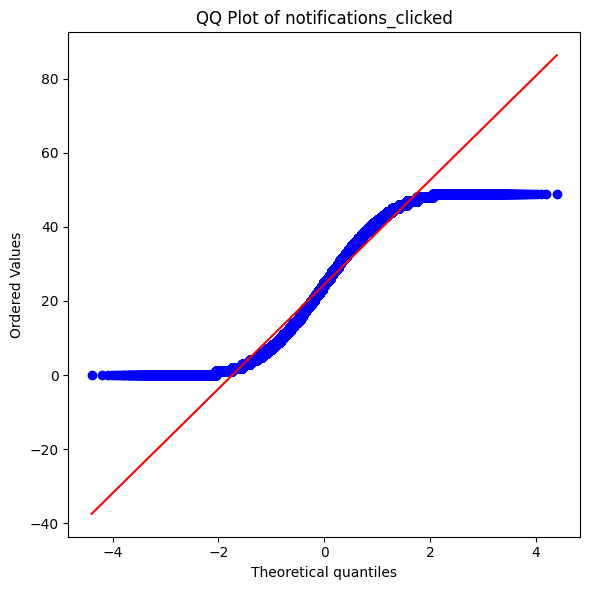

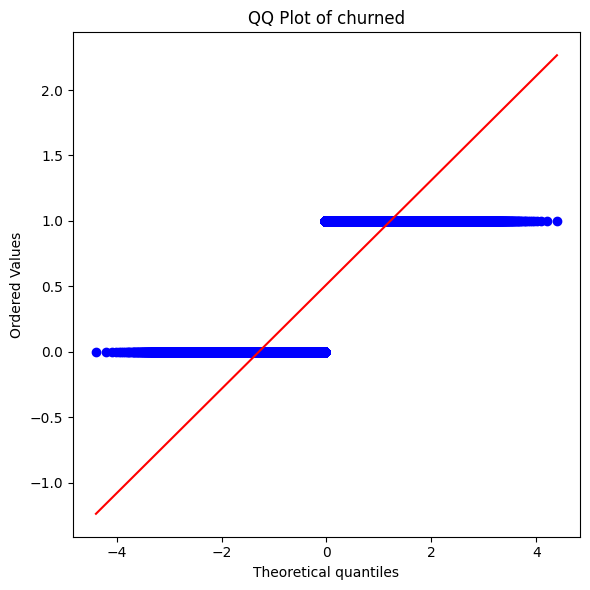


Frequency table for location:
location
Georgia           0.053640
Idaho             0.053576
Vermont           0.053408
California        0.053320
Washington        0.053104
New Jersey        0.053072
Nebrasksa         0.052808
North Carolina    0.052664
North Dakota      0.052616
Utah              0.052616
New York          0.052592
Alabama           0.052440
Wisconsin         0.052424
Virginia          0.052328
South Carolina    0.052272
Maine             0.052184
West Virginia     0.051888
Florida           0.051840
Montana           0.051208
Name: proportion, dtype: float64

Frequency table for subscription_type:
subscription_type
Premium    0.250832
Student    0.250440
Free       0.250152
Family     0.248576
Name: proportion, dtype: float64

Frequency table for payment_plan:
payment_plan
Monthly    0.500496
Yearly     0.499504
Name: proportion, dtype: float64

Frequency table for payment_method:
payment_method
Debit Card     0.250336
Paypal         0.250256
Credit Card    0.24970

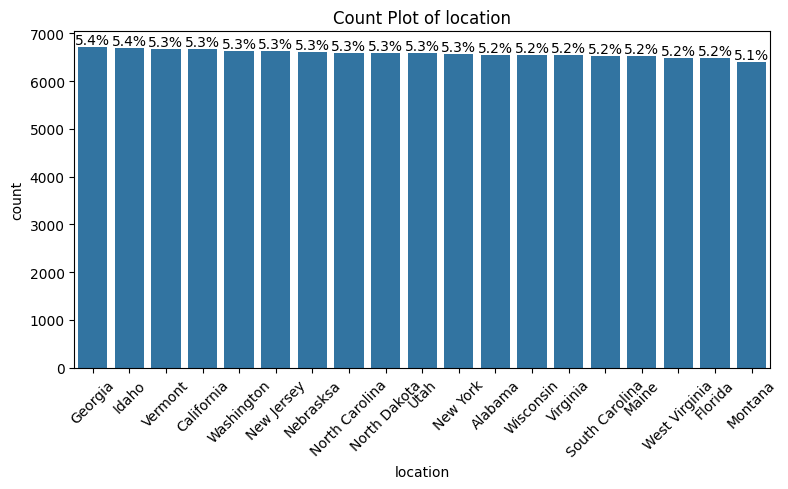

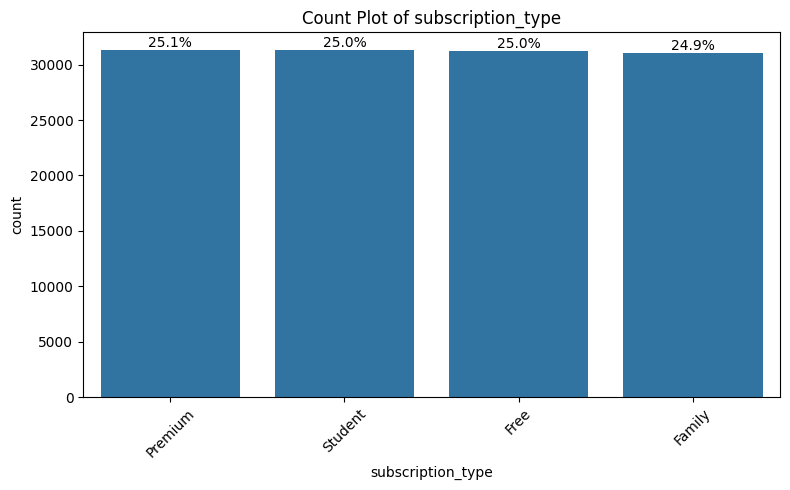

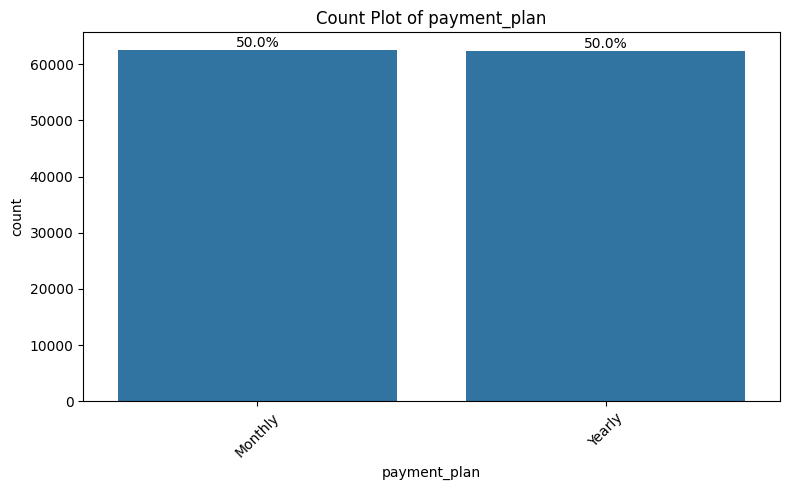

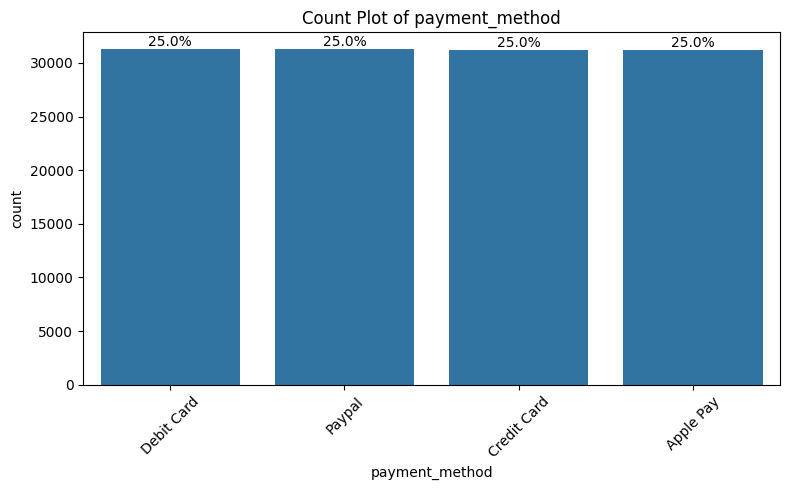

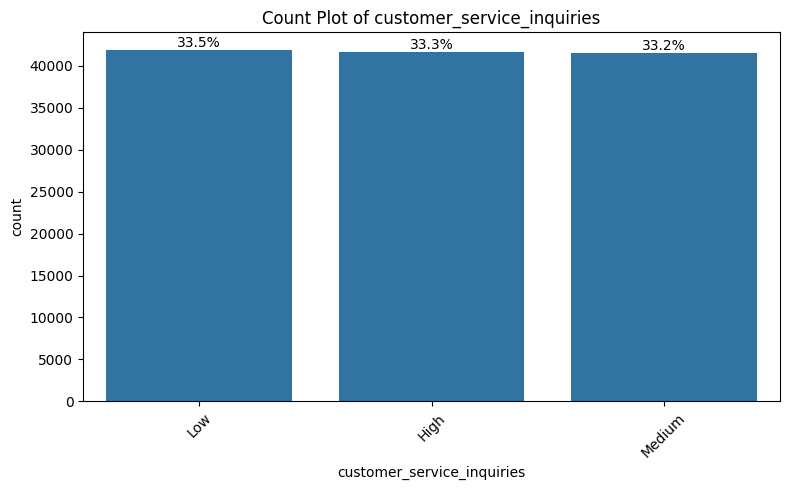

In [55]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

#numerical variables: summary stats
print("\nNumerical Summary:\n", train[num_cols].describe())

#histograms for each numerical variables 
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# outliers box plots for numerical variabels
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
'''  
Q1 = train[col].quantile(0.25)
Q3 = train[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
print(f"{col}: {len(outliers)} outliers")
'''
from scipy.stats import skew

#skewness for each numerical column
for col in num_cols.drop('customer_id'):
    skewness = skew(train[col])
    print(f"{col} | Skewness: {skewness:.2f}")



#checking for normality:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ plot for each numerical variable to check for normality
for col in num_cols.drop('customer_id'):  # Skip 'customer_id' as it's not numerical
    plt.figure(figsize=(6, 6))
    stats.probplot(train[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")
    plt.tight_layout()
    plt.show()

#categorical variables
#frequency tables categorical variables
for col in cat_cols:
    print(f"\nFrequency table for {col}:")
    print(train[col].value_counts(normalize=True))

#proportions visualization: Useful for imbalanced categories
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

    # Add percentages
    total = len(train[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()


### Numerical Univariate Analysis:
#### Distribution shape: Normality? Skewness? Heavy tails?
##### The distribution shape for the numerical variables are roughly symmetrical. Checking normality using the QQ plot, age, signup_date, weekly hours, average_session_length, song_skip_rate, weekly_songs_played, weekly_unique_songs, num_favorite_artists, num_platform_friends, num_playlists_created, num_shared_playlists, and notifications_clicked numerical variables, they all roughly followed the normality line, but have heavily deviated tails. num_subscription is piecewise because there can only be integers for pausing subscription and churned is also piecewise since it is a binary variable. 
#### Summary stats: Mean, median, std dev, IQR, range
##### Age: Mean: 48.41, Standard Deviation: 17.90, Range: 18 to 79, 25th Percentile (Q1): 33, 50th Percentile (Median): 48, 75th Percentile (Q3): 64.
##### The age distribution is moderately spread with a significant portion of customers aged between 33 and 64 years.
##### Number of Subscription Pauses: Mean: 1.99, Standard Deviation: 1.42, Range: 0 to 4 pauses
##### This feature indicates that most customers have paused their subscriptions once or twice.
##### Signup Date: Mean: -1460.68 (Days since a reference point), Standard Deviation: 844.13, Range: -2922 to -1
##### The signup date reflects the number of days since a certain reference date, with most signups occurring closer to the reference date.
##### Weekly Hours: Mean: 25.04, Standard Deviation: 14.45, Range: 0.000068 to 50, 25th Percentile (Q1): 12.47, 50th Percentile (Median): 25.12, 75th Percentile (Q3): 37.57
##### Weekly hours vary significantly, with most users engaging in 12 to 37 hours of activity each week.
##### Average Session Length: Mean: 60.42 minutes, Standard Deviation: 34.38, Range: 1 to 119.99 minutes, 25th Percentile (Q1): 30.64, 50th Percentile (Median): 60.34, 75th Percentile (Q3): 90.23
##### Average session lengths are spread across a wide range, with most sessions lasting between 30 to 90 minutes.
##### Song Skip Rate: Mean: 0.50, Standard Deviation: 0.29, Range: 0.000006 to 1, 25th Percentile (Q1): 0.25, 50th Percentile (Median): 0.50, 75th Percentile (Q3): 0.75
##### The song skip rate is close to 50% on average, indicating that many users skip roughly half of the songs they listen to.
##### Weekly Songs Played: Mean: 250.82, Standard Deviation: 143.33, Range: 3 to 499 songs, 25th Percentile (Q1): 127, 50th Percentile (Median): 251, 75th Percentile (Q3): 375
##### This feature shows a wide distribution, with most users playing between 127 and 375 songs per week.
##### Weekly Unique Songs: Mean: 150.78, Standard Deviation: 85.79, Range: 3 to 299 unique songs, 25th Percentile (Q1): 76, 50th Percentile (Median): 150, 75th Percentile (Q3): 225
##### Most users play between 76 and 225 unique songs per week.
##### Number of Favorite Artists: Mean: 24.50, Standard Deviation: 14.45, Range: 0 to 49, 25th Percentile (Q1): 12, 50th Percentile (Median): 25, 75th Percentile (Q3): 37
##### Users generally have between 12 and 37 favorite artists, with a few having no favorite artists.
##### Number of Platform Friends: Mean: 99.71, Standard Deviation: 57.68, Range: 0 to 199, 25th Percentile (Q1): 50, 50th Percentile (Median): 100, 75th Percentile (Q3): 150
##### The number of platform friends shows significant variation, with most users having between 50 and 150 friends.
##### Number of Playlists Created: Mean: 49.46, Standard Deviation: 28.94, Range: 0 to 99 playlists, 25th Percentile (Q1): 24, 50th Percentile (Median): 49, 75th Percentile (Q3): 75
##### Users typically create between 24 and 75 playlists.
##### Number of Shared Playlists:, Mean: 24.55, Standard Deviation: 14.45, Range: 0 to 49 shared playlists, 25th Percentile (Q1): 12, 50th Percentile (Median): 25, 75th Percentile (Q3): 37
##### Most users have between 12 and 37 shared playlists.
##### Notifications Clicked: Mean: 24.45, Standard Deviation: 14.42, Range: 0 to 49 clicked notifications, 25th Percentile (Q1): 12, 50th Percentile (Median): 24, 75th Percentile (Q3): 37
##### Users generally click between 12 and 37 notifications.
##### Churned (Target Variable): Mean: 0.51 (indicating that roughly 51% of users have churned), Standard Deviation: 0.50, Range: 0 to 1, 25th Percentile (Q1): 0, 50th Percentile (Median): 1, 75th Percentile (Q3): 1
##### The churn variable indicates a near even distribution between users who churned (1) and those who did not (0).
#### Outliers: Use boxplots or z-scores/IQR rule
##### Using box plots to check if there are any outliers within any numerical variables, we can see that there are no outliers. This was also validated using IQR to check for outliers. 
### Categorical Univariate Analysis:
#### Frequency tables
##### We use frequency tables to check the proportions of the categorical variables to see if there are any imbalanced categories. For the location variable, we can see that the proportions range from 5.1% to 5.4%. This means we have a roughly balanced category for location. For subscription types it ranges from 24.9% to 25.1%, indicating a balanced category. Payment plan and Payment method are all equal, so we have balanced categories for these variables. For customer service inquiries, it ranges from 33.2% to 33.5%, so we have roughly a balanced category.
#### Proportions: Useful for imbalanced categories
##### Using a bar chart with percentages, we can better visualize the proportions of each categorical variable. 

### Bivariate Exploration (with the target variable)


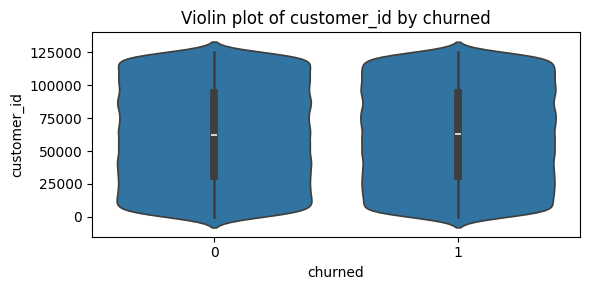

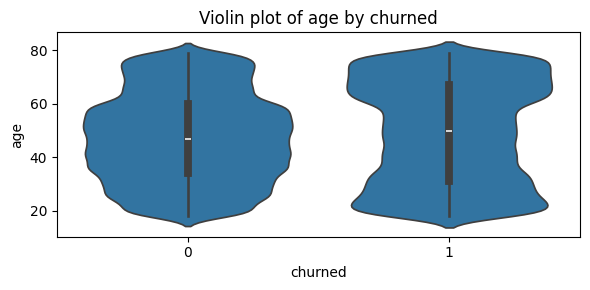

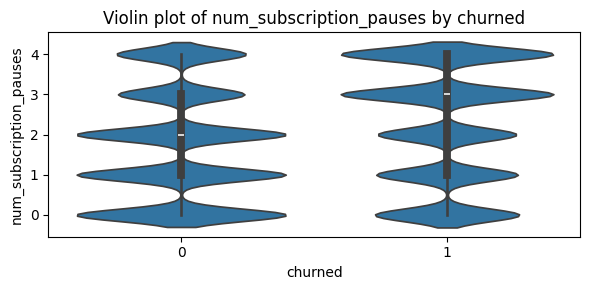

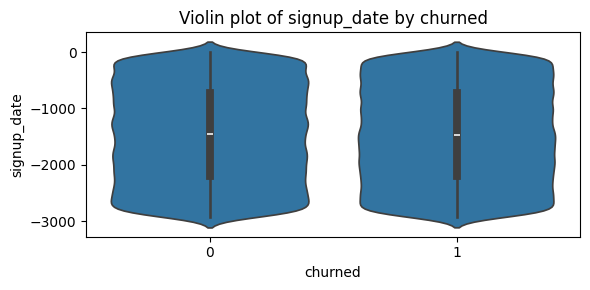

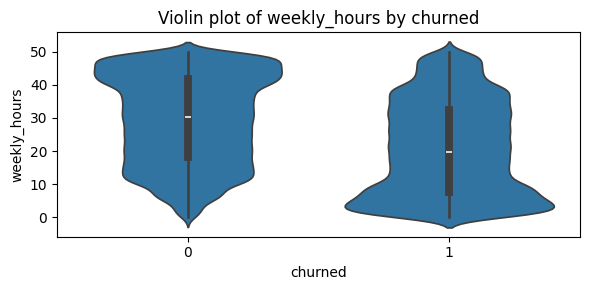

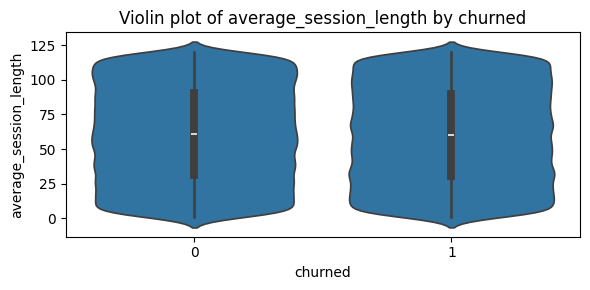

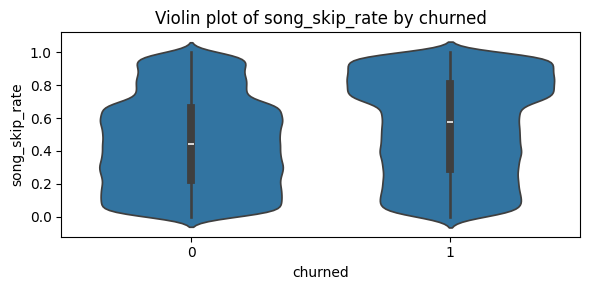

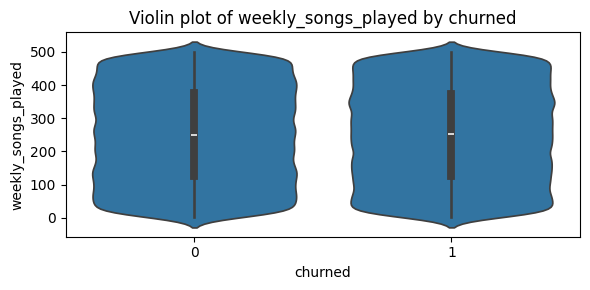

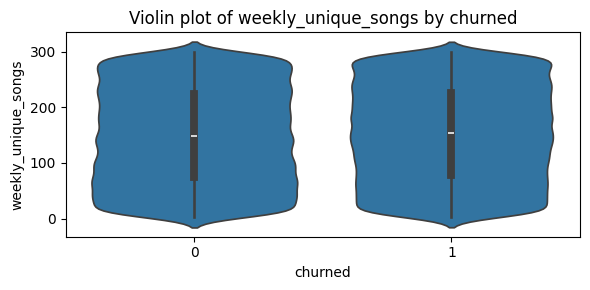

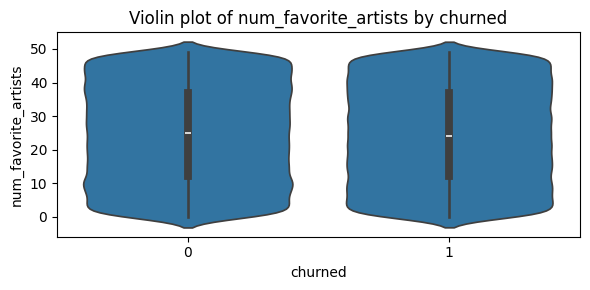

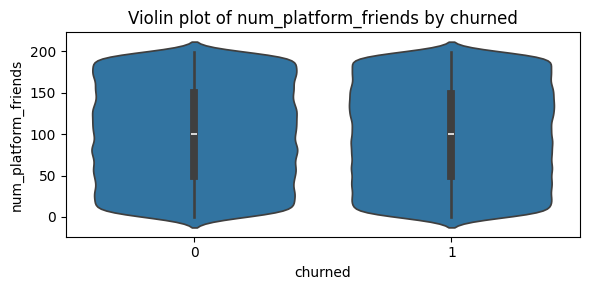

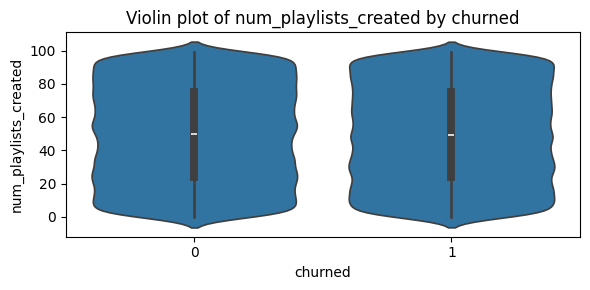

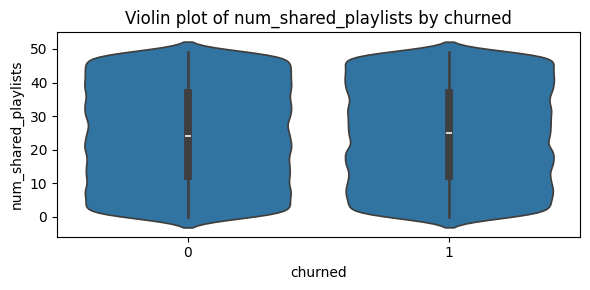

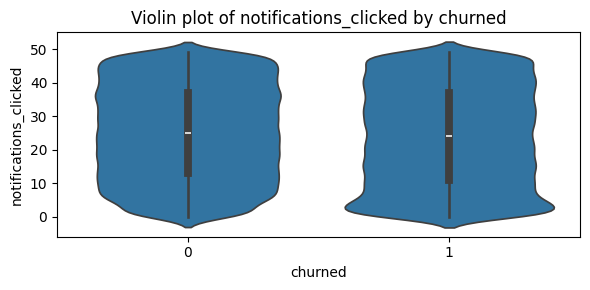

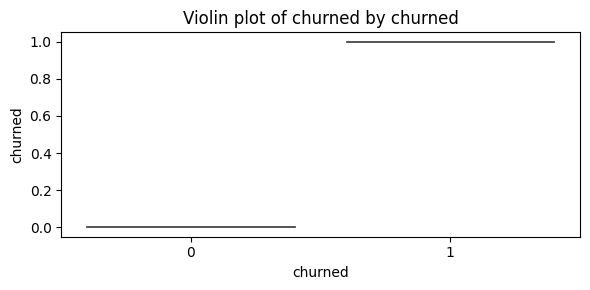


Contingency Table for location vs churned:
churned             0      1   Total
location                            
Alabama          3209   3346    6555
California       3240   3425    6665
Florida          3187   3293    6480
Georgia          3208   3497    6705
Idaho            3273   3424    6697
Maine            3227   3296    6523
Montana          3121   3280    6401
Nebrasksa        3215   3386    6601
New Jersey       3205   3429    6634
New York         3217   3357    6574
North Carolina   3203   3380    6583
North Dakota     3183   3394    6577
South Carolina   3159   3375    6534
Utah             3191   3386    6577
Vermont          3234   3442    6676
Virginia         3233   3308    6541
Washington       3204   3434    6638
West Virginia    3153   3333    6486
Wisconsin        3164   3389    6553
Total           60826  64174  125000

Contingency Table for subscription_type vs churned:
churned                0      1   Total
subscription_type                      
Family   

In [58]:
# Numerical vs Categorical: Violin chart of numerical features by churn
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x='churned', y=col, data=train)
    plt.title(f"Violin plot of {col} by churned")
    plt.tight_layout()
    plt.show()

# Categorical vs Categorical: Contingency table
import pandas as pd
for col in cat_cols:
    if col != 'churned':
        contingency_table = pd.crosstab(train[col], train['churned'], margins=True, margins_name="Total")
        print(f"\nContingency Table for {col} vs churned:")
        print(contingency_table)



### Numerical vs Categorical:
#### Age vs. Churned
##### From the violin chart, we can see that there are more churned subscriptions for 20 years and younger than not churned. From ages 20-40, we can see that there are more people not churning their subscription. For ages 40-60, there are more people not churning their subscription compared to those who are 40-60 that are churning their subscription. However, there is a large drop of 60-80 year olds in density for not churned subscription. The violin plot density shows that there were more 60-80 year olds churning their subcription. 
#### Number of Subscription Pauses vs. Churned
##### There are more people who have not churned their subcription that have 0, 1, and 2 numbers of subscription pauses. There are more people who have churned their subscription after pausing their subscription 3 and 4 times. 
#### Sign up Dates vs. Churned
##### They are roughly equal. Sign-up dates do not affect customers churning or not churning their subscription.
#### Weekly Hours vs. Churned
##### For customers who had a 0-10 average number of weekly listening hours, there were more customers churning their subscription. From 10-40 average number of weekly listening hours, it was roughly the same for both churned and not churned subscriptions, indicating that the customers didn't feel the need to churn or not churn their subscription. However, from 40-50 average number of weekly listening hours, there were more people not churning their subscription. 
#### Average Session Length vs. Churned
##### For average length of each music listening session (in hours), there wasn't any significant differences between churning or not churning their subscription, suggesting that the average length of music listening sessions didn't help customers to determine to churn or not churn their subscription.
#### Song Skip Rate vs. Churned
##### From about 0.1 - 0.7 percentage of songs the user does not finish, there were slighlty more customers that didn't churn their subscription. For 0.7 to 1.0 percentage of songs the user does not finish, therer were more customers that churned their subscription.
#### Weekly Songs Played vs. Churned
##### For average number of songs the user plays in a week, the violin charts were very similar, indicating that customers didn't really churn or not churn their subscription based on this variable. 
#### Weekly Unique Songs vs. Churned
##### For 0-100 average number of unique songs the user plays in a week, there was slightly more customers that did not churn their subscription. From 100-300 average number of unique songs the user plays in a week, they are roughly the same so customers didn't churn or not churn their subcription based on this. 
#### Number of Favorite Artists vs. Churned
##### For number of artists the user set as favorite artists, there wasn't any significant difference in customers churning or not churning their subscription. 
#### Number of Platform Friends vs. Churned
##### For number of user connections in the app, there wasn't any significant difference in customers churning or not churning their subscription. 
#### Number of Playlists Created vs. Churned
##### For number of playlists the user created, there wasn't any significant difference in customers churning or not churning their subscription. 
#### Number of Shared Playlists vs. Churned
##### For number of playlists that are shared publicly, there wasn't any significant difference in customers churning or not churning their subscription. 
#### Notifications Clicked vs. Churned
##### For about 0-5 of number of in-app notifications clicked on, more customers churned their subscription. From 5-50, the violin chart looked similar, so after 5 notications clicked on, people didn't care to churn or not churn their subscription. 
### Categorical vs Categorical:
#### Location vs. Churned
##### For example, Alabama has 3,209 non-churned users and 3,346 churned users, with a total of 6,555 users. California has 3,240 non-churned and 3,425 churned users, with a total of 6,665 users. States like Georgia, Florida, and New York show similar patterns, with churn rates varying across locations.the location variable demonstrates diverse churn rates, providing a potential area for further investigation regarding geographical influences on user behavior.
#### Subscription Type vs. Churned
##### The Family subscription plan has 20,327 non-churned users and 10,745 churned users, indicating a lower churn rate compared to other plans. The Free subscription plan has a higher churn rate, with 6,439 non-churned users and 24,830 churned users. Premium and Student plans exhibit a mixed distribution of churned and non-churned users, with Student showing a higher churn count (17,967 churned users vs. 13,338 non-churned users). These results suggest that users with a Free subscription are more likely to churn compared to other subscription types, which could be indicative of the value proposition or engagement level associated with each plan.
#### Payment Plan vs. Churned
##### Monthly payment plan users are more likely to churn, with 30,401 non-churned and 32,161 churned users (a churn rate of approximately 51.3%). Yearly payment plan users show a slightly lower churn rate, with 30,425 non-churned and 32,013 churned users (a churn rate of approximately 51.3%). Both plans have a similar distribution of churned and non-churned users, suggesting that the payment plan may not be a strong differentiator in terms of churn behavior.
#### Payment Method vs. Churned
##### Apple Pay has 15,015 non-churned and 16,198 churned users, indicating a relatively balanced distribution. Credit Card, Debit Card, and Paypal users show similar distributions, with no notable differences in churn rates across the payment methods. The payment method does not seem to significantly affect churn, with all methods showing relatively equal distributions of churned and non-churned users.
#### Customer Service Inquiries vs. Churned
##### High customer service inquiries show a significant churn rate, with 10,673 non-churned and 30,910 churned users, indicating that users who have higher levels of interaction with customer service are more likely to churn. Medium and Low customer service inquiries show varying churn distributions, with Medium having a higher churn count compared to Low inquiries. These results suggest that users who experience more frequent or intensive customer service interactions are more likely to churn, highlighting the potential role of customer satisfaction and service quality in influencing churn behavior.

### Multivariate Patterns: Correlation Matrix


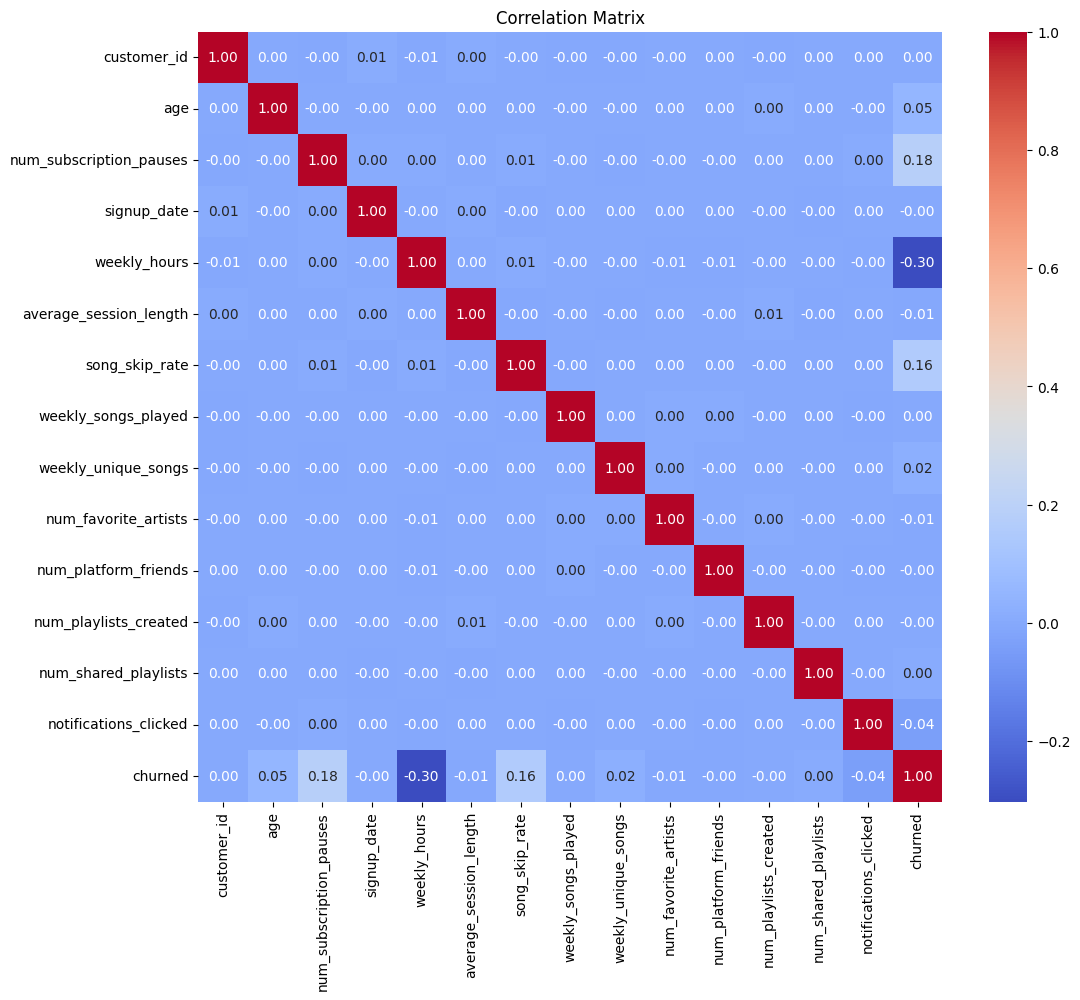

In [91]:
plt.figure(figsize=(12, 10))
corr = train[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#pair plot

##### the number of times the user has paused their subscription (max 2) and percentage of songs the user does not finish is very slightly positively correlated with churned with values 0.18 and 0.16 respectively. These factors show a very mild tendency to increase with churned users. This suggests that users who pause their subscriptions more frequently or skip more songs may be slightly more likely to churn, but the relationship is not strong.The average number of weekly listening hours is strongly negatively correlated with churned with a value of -0.30. This indicates that users who listen to more hours per week are less likely to churn, showing a stronger, inverse relationship.

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'num_subscription_pauses', 'weekly_hours', 'average_session_length', 
            'song_skip_rate', 'weekly_songs_played', 'weekly_unique_songs', 
            'num_favorite_artists', 'num_platform_friends', 'num_playlists_created', 
            'num_shared_playlists', 'notifications_clicked']

sns.pairplot(train[num_cols + ['churned']], hue='churned', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot of Numerical Features by Churned Status', y=1.02)
plt.show()

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# List of numerical columns\nnum_cols = [\'age\', \'num_subscription_pauses\', \'weekly_hours\', \'average_session_length\', \n            \'song_skip_rate\', \'weekly_songs_played\', \'weekly_unique_songs\', \n            \'num_favorite_artists\', \'num_platform_friends\', \'num_playlists_created\', \n            \'num_shared_playlists\', \'notifications_clicked\']\n\n# Creating a pairplot for the numerical columns, with \'churned\' as hue\nsns.pairplot(train[num_cols + [\'churned\']], hue=\'churned\', diag_kind=\'kde\', markers=["o", "s"])\nplt.suptitle(\'Pairplot of Numerical Features by Churned Status\', y=1.02)\nplt.show()\n'

/var/folders/j8/vpgy5cl96b93692bcgcpxrwh0000gn/T/ipykernel_34074/3162382379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churned", data=train, palette=["blue", "red"])


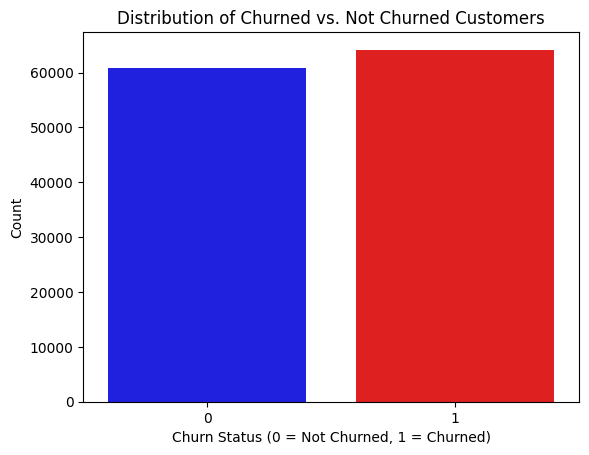

churned
1    64174
0    60826
Name: count, dtype: int64


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

#churn distribution
sns.countplot(x="churned", data=train, palette=["blue", "red"])

plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Count")
plt.title("Distribution of Churned vs. Not Churned Customers")

plt.show()

# values of not churned and churned customers 
churn_counts = train["churned"].value_counts()
print(churn_counts)

##### From the barplot, we can observe that there are a total of 64174 of churned customers. There are a total of 60826 of not churned customers. Since the churned and non-churned classes are close in proportion (about 51% vs. 49%), the dataset is not highly imbalanced—it is fairly balanced, so we don't have to consider using a class weight. 

### Sub-Questions Based from EDA: 
#### Age & Churn: Does user age significantly affect the likelihood of churn, and are younger or older users more prone to leaving the service?
#### Listening Time & Churn: Is there a threshold of weekly listening hours below which users are more likely to churn?
#### Subscription Pauses & Churn: Does a higher number of subscription pauses indicate a higher risk of churn?
#### Engagement & Churn: Do users who interact less with notifications have higher churn rates?
#### Skip Rate & Churn: Is there a correlation between higher song skip rates and increased churn?

## Hypothesis Testing 

##### From EDA, we can see that the variables: age, num_subscription_pauses, weekly_hours, song_skip_rate, and notifications_clicked, have some significance, so we will be doing hypothesis testing on these variables specifically. However, I decided to look at all of the variables to see if there were any that could've been significant that I missed. We do this by doing Mann-Whitney test and using Bonferroni to adjust the p-value. 
##### Feom EDA of categorical variables: customer_service_inquiries and subscription_type, have some signficance, but we will look at all hypothesis testing in case there are more categorical variables that are significant. We will do this doing the Chi-squared test and the Bonferroni Correction. 

In [71]:
#Hypothesis testing for numerical values

from scipy.stats import mannwhitneyu
import statsmodels.stats.multitest as smm

key_vars = ['age', 'num_subscription_pauses', 'weekly_hours', 'average_session_length',
    'song_skip_rate', 'weekly_songs_played', 'weekly_unique_songs',
    'num_favorite_artists', 'num_platform_friends', 'num_playlists_created',
    'num_shared_playlists', 'notifications_clicked']
p_values = []

#Mann-Whitney test
for var in key_vars:
    churned = train[train['churned'] == 1][var]
    not_churned = train[train['churned'] == 0][var]
    stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')
    p_values.append(p)
    print(f"{var}: raw p-value = {p:.5f}")

#Bonferroni
rejected, corrected_pvals, _, _ = smm.multipletests(p_values, method='bonferroni')
print("\nBonferroni-adjusted results:")
for var, p_corr, reject in zip(key_vars, corrected_pvals, rejected):
    result = "Significant" if reject else "Not significant"
    print(f"{var}: adjusted p = {p_corr:.5f} → {result}")

#For categorical variables Hypothesis testing

from scipy.stats import chi2_contingency

cat_vars = [col for col in cat_cols if col != 'churned']
cat_pvals = []

print("\nChi-Square Tests (Categorical Variables):")
for var in cat_vars:
    table = pd.crosstab(train[var], train['churned'])
    chi2, p, dof, expected = chi2_contingency(table)
    cat_pvals.append(p)
    print(f"{var} | Chi2 p-value: {p:.5f}")

# Bonferroni
rejected_cat, corrected_cat_pvals, _, _ = smm.multipletests(cat_pvals, method='bonferroni')
print("\nBonferroni-adjusted p-values (categorical):")
for var, p_corr, reject in zip(cat_vars, corrected_cat_pvals, rejected_cat):
    print(f"{var}: {p_corr:.5f} | Significant: {reject}")



age: raw p-value = 0.00000
num_subscription_pauses: raw p-value = 0.00000
weekly_hours: raw p-value = 0.00000
average_session_length: raw p-value = 0.02140
song_skip_rate: raw p-value = 0.00000
weekly_songs_played: raw p-value = 0.75058
weekly_unique_songs: raw p-value = 0.00000
num_favorite_artists: raw p-value = 0.05723
num_platform_friends: raw p-value = 0.29197
num_playlists_created: raw p-value = 0.44088
num_shared_playlists: raw p-value = 0.17528
notifications_clicked: raw p-value = 0.00000

Bonferroni-adjusted results:
age: adjusted p = 0.00000 → Significant
num_subscription_pauses: adjusted p = 0.00000 → Significant
weekly_hours: adjusted p = 0.00000 → Significant
average_session_length: adjusted p = 0.25681 → Not significant
song_skip_rate: adjusted p = 0.00000 → Significant
weekly_songs_played: adjusted p = 1.00000 → Not significant
weekly_unique_songs: adjusted p = 0.00000 → Significant
num_favorite_artists: adjusted p = 0.68677 → Not significant
num_platform_friends: adjust

##### Bonferroni is adjusting for false positives by dividing the significance level of alpha by the number of tests. 
#### Numerical Variables Hypothesis Testing:
##### For the numerical variables, we get that age, num_subscription_pauses, weekly_hours, song_skip_rate, weekly_unique_songs, and notifications_clicked were all signficant variables. 
##### Age: Churn likelihood varies significantly by age group
##### num_subscription_pauses: Frequent pauses, suggests higher churn risk
##### weekly_hours: Low weekly listening hours correlate with churn 
##### song_skip_rate: Higher skip rates means higher churn
##### weekly_unique_songs: Lower unique songs relates to churn
##### notifications_clicked: Less interaction means higher churn risk.
#### Categorical Variables Hypothesis Testing:
##### For categorical variables, we get subscription_type and customer_service_inquires are significant variables. 
##### subscription_type: Strongly associated with churn
##### customer_service_inquires: More inquiries correlate with churn.

## Modeling (Baseline Model - Logistic Regression Model)


Logistic Regression
Accuracy: 0.80132
ROC AUC: 0.8910406374025547
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     12163
           1       0.81      0.81      0.81     12837

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000


Random Forest
Accuracy: 0.84228
ROC AUC: 0.9327352948140593
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     12163
           1       0.84      0.85      0.85     12837

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


Decision Tree
Accuracy: 0.8024
ROC AUC: 0.802303755745512
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     12163
           1       0.81      0.81      0.81     12

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.84508
ROC AUC: 0.9397535799956898
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12163
           1       0.85      0.85      0.85     12837

    accuracy                           0.85     25000
   macro avg       0.84      0.85      0.84     25000
weighted avg       0.85      0.85      0.85     25000



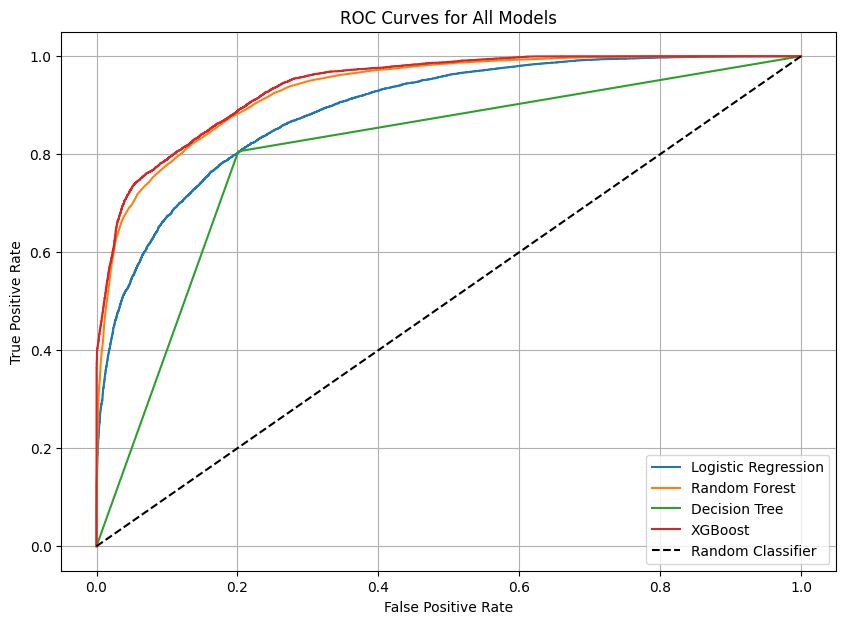

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

target = 'churned'
features = [col for col in train.columns if col != target]

X = train[features]
y = train[target]
X_test = test[features]

#encode categorical columns
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

#align train and test columns
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

#split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)
    
    val_preds = model.predict(X_val_scaled)
    val_probs = model.predict_proba(X_val_scaled)[:, 1]
    
    print("Accuracy:", accuracy_score(y_val, val_preds))
    print("ROC AUC:", roc_auc_score(y_val, val_probs))
    print(classification_report(y_val, val_preds))
    
    #ROC curve
    fpr, tpr, _ = roc_curve(y_val, val_probs)
    plt.plot(fpr, tpr, label=name)

#ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid()
plt.show()


#### Logistic Regression:
##### Accuracy: 80.132%
##### ROC AUC: 0.891
##### F1-Score (Class 1): 0.81
#### Random Forest
##### Accuracy: 84.23%
##### ROC AUC: 0.933
##### F1-Score (Class 1): 0.85
#### Decision Tree
##### Accuracy: 80.24%
##### ROC AUC: 0.802
##### F1-Score (Class 1): 0.81
#### XGBoost
##### Accuracy: 84.51%
##### ROC AUC: 0.940
##### F1-Score (Class 1): 0.85
##### Conclusion: XGBoost has the best accuracy (84.51%) and ROC AUC (0.940), making it the best-performing model here. Random Forest is also a strong contender, with very similar performance to XGBoost but slightly lower in AUC (0.933). Logistic Regression is a bit behind but still solid with good balance between precision and recall. Decision Tree seems to underperform compared to the other models, both in terms of accuracy and ROC AUC.

do AISC or BISC for feature selection. Once you get the features then fit the logistic regression on this. More advanced plots will have a plot that will show the feature selected variables. In the report you can compare the features with the feature selected variables and hypothesis testing varibales. Then do the EDA on whichever gives the lower amount of feature selected variables. Do EDA on those features instead.

For the report, do it in the structure of how the scientific papers do it.

## Logistic Regression AIC Feature Selection

In [146]:
#AIC

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant
import statsmodels.api as sm
from itertools import combinations

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=['churned'])
y_train = train['churned']

#convert categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#align columns in case test and train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

#standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#dataFrame to use with statsmodels
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df = add_constant(X_train_df)

# AIC-based Stepwise Feature Selection
def stepwise_selection(X, y, criterion='aic'):
    initial_features = []
    remaining_features = list(X.columns)
    best_score = np.inf
    selected_features = []

    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = selected_features + [candidate]
            model = sm.Logit(y, X[features]).fit(disp=0)
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < best_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            best_score = best_new_score
        else:
            break

    return selected_features
print("AIC - Logistic Regression")

selected_features = stepwise_selection(X_train_df, y_train, criterion='aic')
print("Selected Features:", selected_features)

selected_features_clean = [feat for feat in selected_features if feat != 'const']

#final logistic regression
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train[selected_features_clean], y_train)

#predict and evaluate
y_pred = final_model.predict(X_val[selected_features_clean])

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


AIC - Logistic Regression
Selected Features: ['subscription_type_Free', 'customer_service_inquiries_Low', 'weekly_hours', 'num_subscription_pauses', 'customer_service_inquiries_Medium', 'subscription_type_Student', 'song_skip_rate', 'age', 'notifications_clicked', 'const', 'weekly_unique_songs', 'payment_method_Credit Card', 'num_favorite_artists', 'location_Virginia', 'average_session_length']
Accuracy: 0.80208
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     12163
           1       0.81      0.81      0.81     12837

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



## Logistic Regression BIC Feature Selection

BIC - Logistic Regression
Selected Features: ['subscription_type_Free', 'customer_service_inquiries_Low', 'weekly_hours', 'num_subscription_pauses', 'customer_service_inquiries_Medium', 'subscription_type_Student', 'song_skip_rate', 'age', 'notifications_clicked', 'const', 'weekly_unique_songs']
Accuracy: 0.80212
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     12163
           1       0.81      0.81      0.81     12837

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



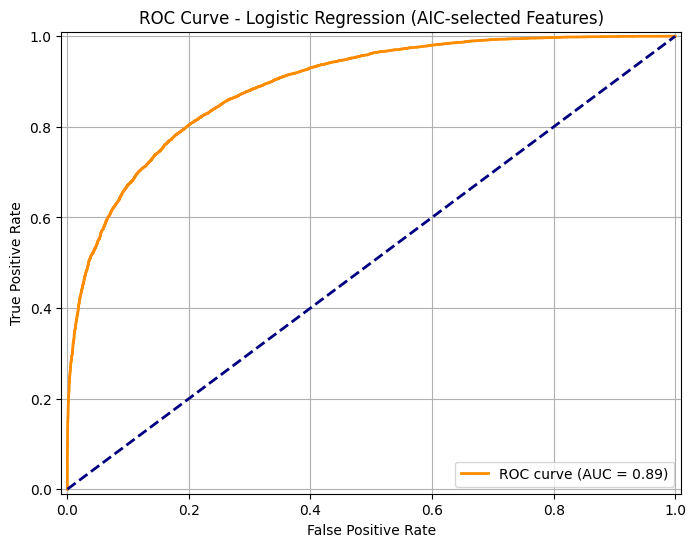

In [148]:
#BIC

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant
import statsmodels.api as sm
from itertools import combinations

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=['churned'])
y_train = train['churned']

#convert categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#align columns in case test and train 
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

#standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#dataFrame to use with statsmodels
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df = add_constant(X_train_df)

#AIC-based Stepwise Feature Selection (BIC)
def stepwise_selection(X, y, criterion='bic'):
    initial_features = []
    remaining_features = list(X.columns)
    best_score = np.inf
    selected_features = []

    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = selected_features + [candidate]
            model = sm.Logit(y, X[features]).fit(disp=0)
            score = model.aic if criterion == 'bic' else model.bic
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < best_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            best_score = best_new_score
        else:
            break

    return selected_features

print("BIC - Logistic Regression")

selected_features = stepwise_selection(X_train_df, y_train, criterion='aic')
print("Selected Features:", selected_features)

selected_features_clean = [feat for feat in selected_features if feat != 'const']

#fit final logistic regression
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train[selected_features_clean], y_train)

#predict and evaluate
y_pred = final_model.predict(X_val[selected_features_clean])

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

#ROC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#predicted probabilities for the positive class
y_val_probs = final_model.predict_proba(X_val[selected_features_clean])[:, 1]

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = roc_auc_score(y_val, y_val_probs)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (AIC-selected Features)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Other Models with Evaluation on test data


Random Forest
Validation Results:
  Accuracy: 0.84228
  ROC AUC: 0.9327352948140593
  Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     12163
           1       0.84      0.85      0.85     12837

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


Decision Tree
Validation Results:
  Accuracy: 0.8024
  ROC AUC: 0.802303755745512
  Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     12163
           1       0.81      0.81      0.81     12837

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000


XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:28:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Results:
  Accuracy: 0.84508
  ROC AUC: 0.9397535799956898
  Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     12163
           1       0.85      0.85      0.85     12837

    accuracy                           0.85     25000
   macro avg       0.84      0.85      0.84     25000
weighted avg       0.85      0.85      0.85     25000



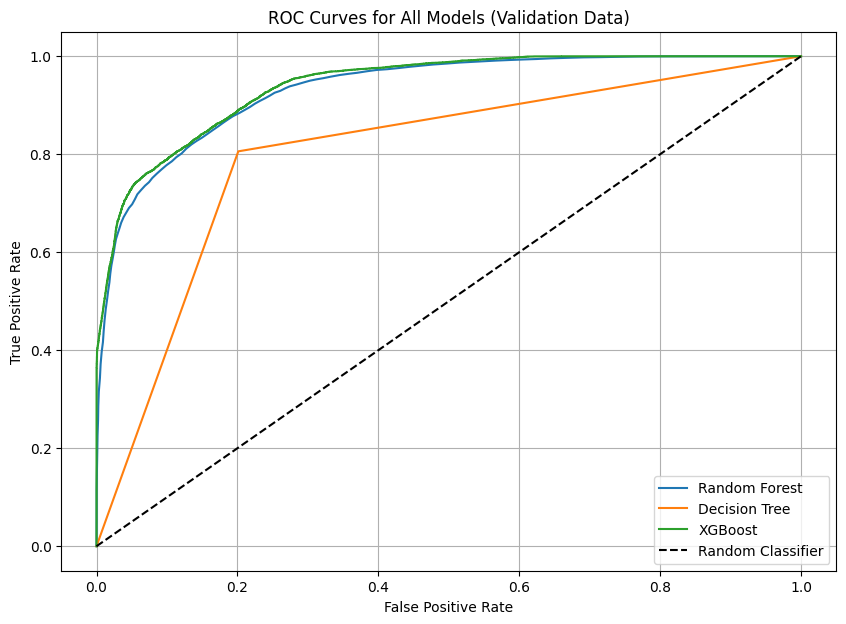

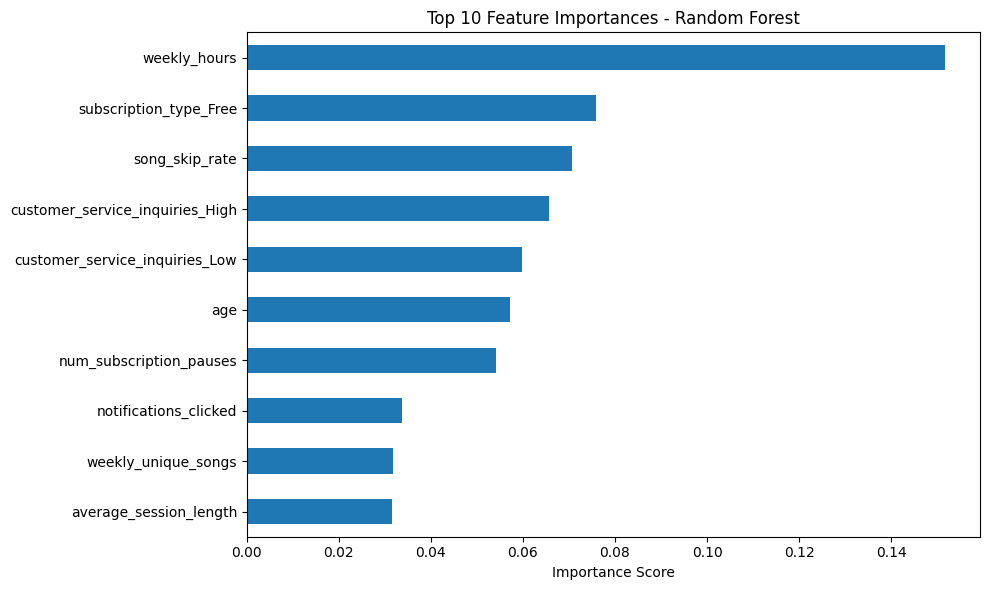

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:28:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


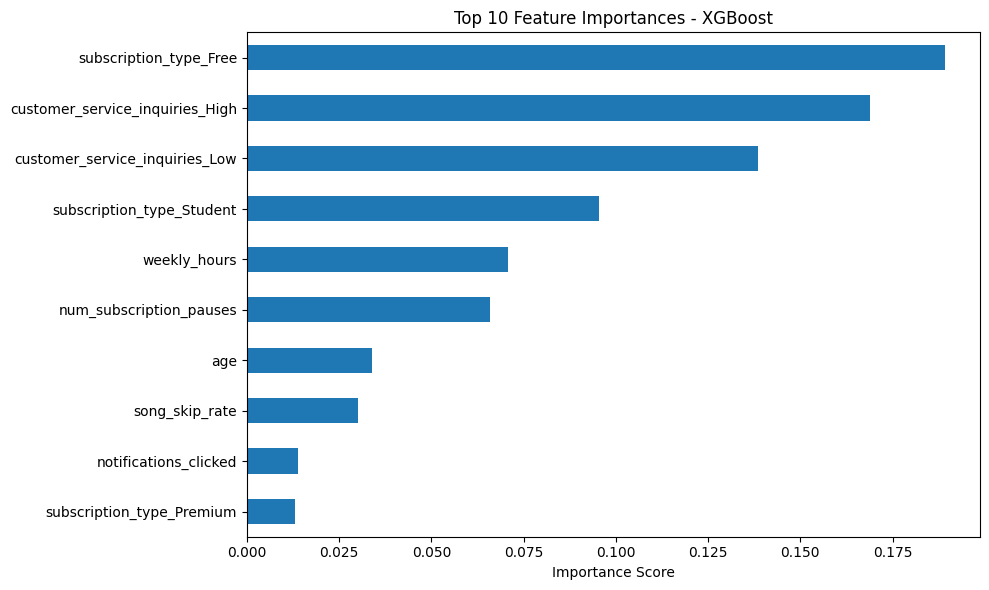

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

target = 'churned'
features = [col for col in train.columns if col != target]

X = train[features]
y = train[target]
X_test = test.copy() 

X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

plt.figure(figsize=(10, 7))

test_predictions = {}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)

    val_preds = model.predict(X_val_scaled)
    val_probs = model.predict_proba(X_val_scaled)[:, 1]
    print("Validation Results:")
    print("  Accuracy:", accuracy_score(y_val, val_preds))
    print("  ROC AUC:", roc_auc_score(y_val, val_probs))
    print("  Classification Report:\n", classification_report(y_val, val_preds))

    fpr, tpr, _ = roc_curve(y_val, val_probs)
    plt.plot(fpr, tpr, label=name)
    
    test_preds = model.predict(X_test_scaled)
    test_probs = model.predict_proba(X_test_scaled)[:, 1]
    test_predictions[name] = {
        'predicted_label': test_preds,
        'predicted_probability': test_probs
    }

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models (Validation Data)")
plt.legend()
plt.grid()
plt.show()

rf_model = models['Random Forest']
rf_model.fit(X_train_scaled, y_train)

rf_importances = rf_model.feature_importances_
rf_feat_imp_series = pd.Series(rf_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_feat_imp_series.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

xgb_model = models['XGBoost']
xgb_model.fit(X_train_scaled, y_train)

xgb_importances = xgb_model.feature_importances_
xgb_feat_imp_series = pd.Series(xgb_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_feat_imp_series.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()